## Predicting Heart Attack in Patients.

### Import Libraries

In [ ]:
# Required Libraries
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report #,roc_curve,
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import plotly.express as px

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
STATE = 101

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('heart.csv')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Statistical Summary

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Checking for duplicates

In [ ]:
# Check for duplicates
print('Duplicates:',data.duplicated().sum())

Duplicates: 1


### Plot a trend of selected variables (cp, thalach, slope, restecg, age)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

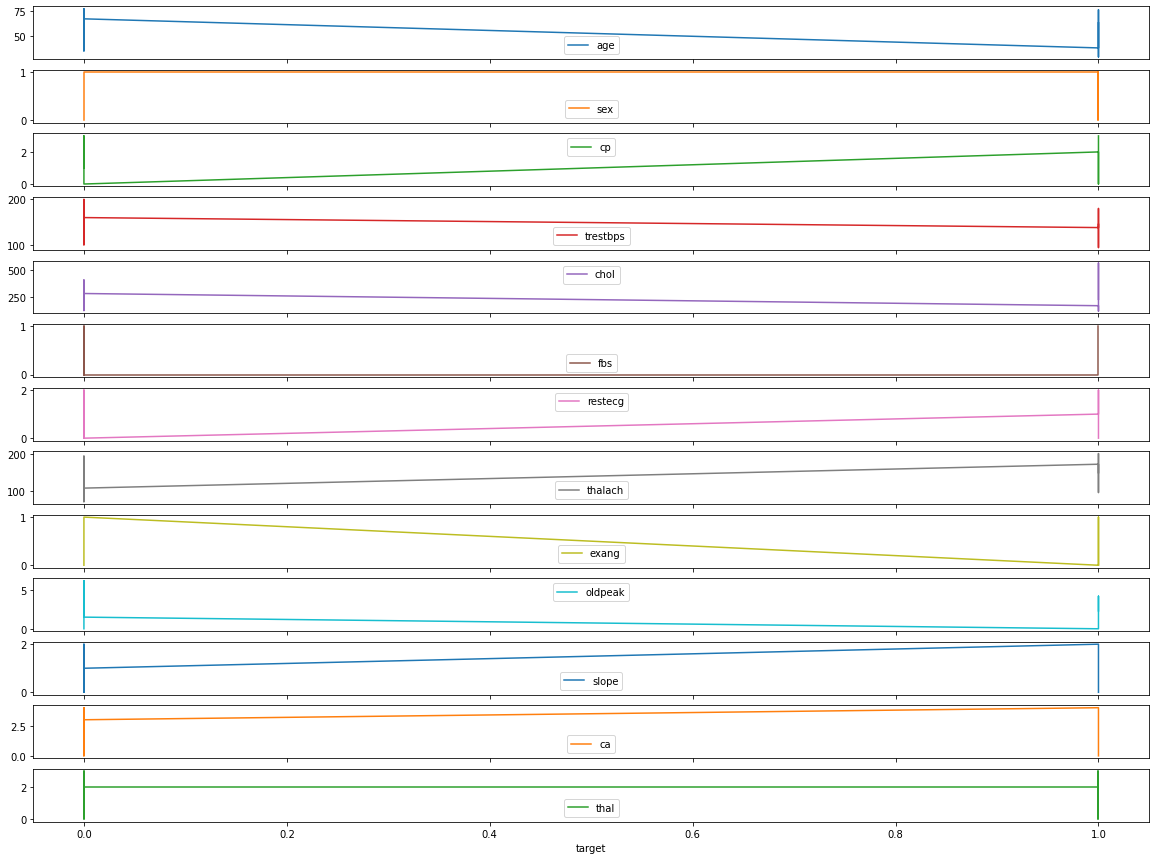

In [ ]:
data[data.columns].plot(x='target', subplots=True, figsize=(20,15))
plt.show()

#### Plot distribution of values

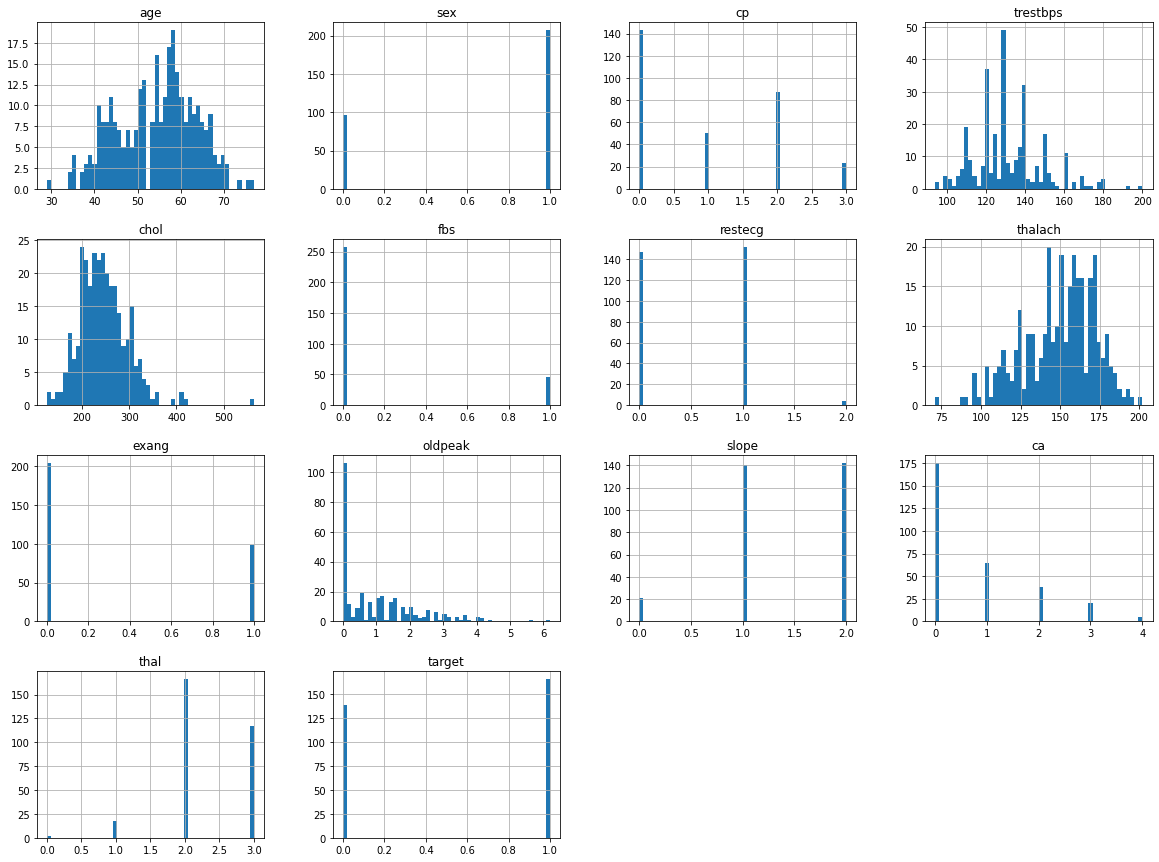

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Sum the weekly sales from every store to get the total weekly sales volume of the retail chain
data_total_weekly_sales = data.groupby(by=['target'], as_index=False)['age'].sum()
data_weekly_sales = data_total_weekly_sales.sort_values('age', ascending=False)

fig = px.line(data_total_weekly_sales, x='target', y='age', title='Total Age volume', width=1200, height=800, template='plotly',
              labels={
                  'x':'target', 'age':'age volume'
              }
            )
fig.show()

In [ ]:
# Sum the weekly sales from every store to get the total weekly sales volume of the retail chain
data_total_weekly_sales = data.groupby(by=['target'], as_index=False)['thalach'].sum()
data_weekly_sales = data_total_weekly_sales.sort_values('thalach', ascending=False)

fig = px.line(data_total_weekly_sales, x='target', y='thalach', title='Total Thalach volume', width=1200, height=800, template='plotly',
              labels={
                  'x':'target', 'thalach':'thalach volume'
              }
            )
fig.show()

In [ ]:
# Sum the weekly sales from every store to get the total weekly sales volume of the retail chain
data_total_weekly_sales = data.groupby(by=['target'], as_index=False)['cp'].sum()
data_weekly_sales = data_total_weekly_sales.sort_values('cp', ascending=False)

fig = px.line(data_total_weekly_sales, x='target', y='cp', title='Total cp volume', width=1200, height=800, template='plotly',
              labels={
                  'x':'target', 'cp':'cp volume'
              }
            )
fig.show()

#### Normalization

In [ ]:
df_scale = data.copy(deep=True)    #  backup data
df_scale = StandardScaler().fit_transform(df_scale)

#  create dataframe
data_norm = pd.DataFrame(df_scale, index=data.index, columns=data.columns)
data_norm.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529


### Correlation of Features

In [ ]:
data_norm.corr()

#  Drop columns with mode = "0.0".  No impact on correlation
print('Columns with mode:0')
for i in data_norm.columns.tolist():
    if (data_norm[i].mode()[0] == 0.0):
        print(' - ',i,data_norm[i].mode()[0])
        data_df = data_norm.drop(i,axis=1)

#  Create correlation dataframe
print()
print('Correlation dataframe')
data_df = pd.DataFrame(columns=['Attributes','Correlation'])
data_df.Attributes = data_norm.corr()['target'].sort_values(ascending=False).index
data_df.Correlation = data_norm.corr()['target'].sort_values(ascending=False).values
print(data_df)

Columns with mode:0

Correlation dataframe
   Attributes  Correlation
0      target     1.000000
1          cp     0.433798
2     thalach     0.421741
3       slope     0.345877
4     restecg     0.137230
5         fbs    -0.028046
6        chol    -0.085239
7    trestbps    -0.144931
8         age    -0.225439
9         sex    -0.280937
10       thal    -0.344029
11         ca    -0.391724
12    oldpeak    -0.430696
13      exang    -0.436757


### Feature selection based on correlation with 'Target'

In [ ]:
# df_norm = data[['STheta','R_SIGMA','R_Depth','R_DYNHT','S_prec','RecInd','T_degC','O2ml_L','salinity']]

x = data_norm.iloc[:,:-1]
y = data_norm['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [ ]:
y

0      0.914529
1      0.914529
2      0.914529
3      0.914529
4      0.914529
         ...   
298   -1.093459
299   -1.093459
300   -1.093459
301   -1.093459
302   -1.093459
Name: target, Length: 303, dtype: float64

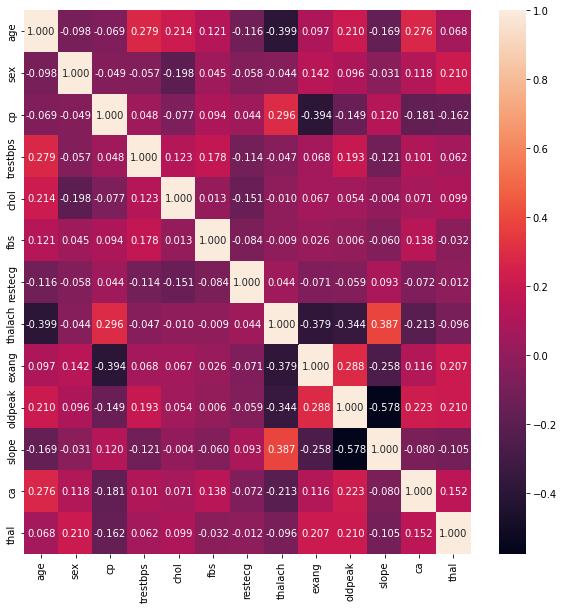

In [ ]:
# Correlation matrix
corr = x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
#Implementing the Variance Inflation Factor

# Creating the VIF dataframe and assigning the independent variable
vif_data = pd.DataFrame()
vif_data ["feature"] = x.columns #where # Getting the independent variables set

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

     feature       VIF
0        age  1.443474
1        sex  1.161866
2         cp  1.284456
3   trestbps  1.170591
4       chol  1.150174
5        fbs  1.087379
6    restecg  1.060998
7    thalach  1.613726
8      exang  1.402001
9    oldpeak  1.705857
10     slope  1.642595
11        ca  1.202570
12      thal  1.147279


### Splitting the data

In [ ]:
x = data.iloc[:,:-1]
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify=y, random_state = 42)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3


In [ ]:
y_train

19     1
247    0
289    0
288    0
60     1
      ..
39     1
104    1
140    1
114    1
110    1
Name: target, Length: 242, dtype: int64

In [ ]:
y_test

179    0
197    0
285    0
194    0
188    0
      ..
14     1
4      1
224    0
202    0
12     1
Name: target, Length: 61, dtype: int64

In [ ]:
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 110, 1: 132})

In [ ]:
# length of train and test
print(len(X_train))
print(len(X_test))

242
61


### Transforming the data

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.61047991, -1.46385011,  2.04442042, ...,  0.94818498,
         1.20703366, -0.56122273],
       [ 1.28205058,  0.68313005,  0.05747367, ..., -0.6677359 ,
         2.16789598, -2.21751422],
       [ 0.0778097 , -1.46385011, -0.93599971, ..., -0.6677359 ,
         0.24617134,  1.09506875],
       ...,
       [-0.36009607, -1.46385011,  1.05094704, ...,  0.94818498,
        -0.71469098, -0.56122273],
       [ 0.0778097 ,  0.68313005,  0.05747367, ...,  0.94818498,
        -0.71469098, -0.56122273],
       [ 1.0630977 , -1.46385011, -0.93599971, ...,  0.94818498,
        -0.71469098, -0.56122273]])

In [ ]:
X_test

array([[ 2.96762591e-01,  6.83130051e-01, -9.35999710e-01,
         1.01871774e+00,  6.51659222e-01, -4.04303770e-01,
        -1.02899151e+00, -1.73824144e+00,  1.39686059e+00,
        -3.92021404e-01, -6.67735900e-01,  2.46171339e-01,
        -2.21751422e+00],
       [ 1.39152703e+00,  6.83130051e-01, -9.35999710e-01,
        -3.73476143e-01,  1.90911055e-01,  2.47338777e+00,
         8.57492926e-01,  5.87075690e-01, -7.15891053e-01,
        -7.24312751e-01, -6.67735900e-01,  1.20703366e+00,
         1.09506875e+00],
       [-9.07478288e-01,  6.83130051e-01, -9.35999710e-01,
         4.61840185e-01,  1.38466767e+00, -4.04303770e-01,
         8.57492926e-01, -1.37348581e+00,  1.39686059e+00,
         6.04852639e-01, -6.67735900e-01,  1.20703366e+00,
         1.09506875e+00],
       [ 6.25191922e-01,  6.83130051e-01,  1.05094704e+00,
         4.61840185e-01, -1.25416274e+00, -4.04303770e-01,
        -1.02899151e+00,  2.22320062e-01, -7.15891053e-01,
         1.60172668e+00, -6.67735900e

### Model building

In [ ]:
def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_test, y_pred))

#### GridSearch CV

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {'max_depth': list(range(10, 100, 10)), 'min_samples_split': [2, 3, 4], 'splitter': ['best', 'random'], 'min_samples_leaf': list(range(10, 100, 10))}
# dtr_grid_serach_cv = GridSearchCV(DecisionTreeRegressor(random_state=3), params, verbose=1, cv=5)

# dtr_grid_serach_cv.fit(X_train, y_train)

In [ ]:
# dtr_grid_serach_cv.best_estimator_

#### logistic_regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_iter': [100, 200, 500]}
lr_grid_serach_cv = GridSearchCV(LogisticRegression(random_state=3), params, verbose=1, cv=5)

lr_grid_serach_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=3),
             param_grid={'max_iter': [100, 200, 500]}, verbose=1)

In [ ]:
lr_grid_serach_cv.best_estimator_

LogisticRegression(random_state=3)

In [ ]:
# from
logistic_regressor = LogisticRegression(random_state=3)
logistic_regressor.fit(X_train, y_train)

y_pred = logistic_regressor.predict(X_test)
test_r2 = logistic_regressor.score(X_test, y_test)
#Calculating the Accuracy
lr_accuracy = accuracy_score(y_test, y_pred)

print('R2 Score:', test_r2)
print('RMSE:', rmse(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Logistic Regression Accuracy:{}%'.format(round((lr_accuracy*100), 3)))
print(classification_report(y_test,y_pred))

R2 Score: 0.8032786885245902
RMSE: 0.4435327625727437
Confusion matrix:
 [[19  9]
 [ 3 30]]
Logistic Regression Accuracy:80.328%
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



#### RFE

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(logistic_regressor, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selector.ranking_, selector.n_features_

(array([4, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1]), 10)

In [ ]:
y_pred_selector = selector.predict(X_test)
test_r2_selector = selector.score(X_test, y_test)
#Calculating the Accuracy
rfe_accuracy = accuracy_score(y_test, y_pred)

print('R2 Score:', test_r2_selector)
print('RMSE:', rmse(y_test, y_pred_selector))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selector))
print('RFE Accuracy:{}%'.format(round((rfe_accuracy*100), 3)))
print(classification_report(y_test, y_pred_selector))

R2 Score: 0.7868852459016393
RMSE: 0.4616435357484827
Confusion matrix:
 [[19  9]
 [ 4 29]]
RFE Accuracy:80.328%
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



#### k-Nearest Neighbors

In [ ]:
params = {'n_neighbors': [10, 50, 100], 'leaf_size': [50, 100, 200]}
knn_grid_serach_cv = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=5)

knn_grid_serach_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [50, 100, 200],
                         'n_neighbors': [10, 50, 100]},
             verbose=1)

In [ ]:
knn_grid_serach_cv.best_estimator_

KNeighborsClassifier(leaf_size=50, n_neighbors=50)

In [ ]:
knn_tuned_params_model = KNeighborsClassifier(n_neighbors=50, leaf_size=50)
knn_tuned_params_model.fit(X_train, y_train)
knn_tuned_params_model.score(X_train, y_train)

0.8347107438016529

In [ ]:
y_pred_selector_knn = knn_tuned_params_model.predict(X_test)
test_r2_selector_knn= knn_tuned_params_model.score(X_test, y_test)
#Calculating the Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_selector_knn)

print('R2 Score:', test_r2_selector_knn)
print('RMSE:', rmse(y_test, y_pred_selector_knn))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selector_knn))
print('k-Nearest Neighbors:{}%'.format(round((knn_accuracy*100), 3)))
print(classification_report(y_test, y_pred_selector_knn))

R2 Score: 0.8032786885245902
RMSE: 0.4435327625727437
Confusion matrix:
 [[17 11]
 [ 1 32]]
k-Nearest Neighbors:80.328%
              precision    recall  f1-score   support

           0       0.94      0.61      0.74        28
           1       0.74      0.97      0.84        33

    accuracy                           0.80        61
   macro avg       0.84      0.79      0.79        61
weighted avg       0.84      0.80      0.79        61



#### Decision Trees Classifier

In [ ]:
params = {'criterion':["gini", "entropy"], 'max_depth': list(range(10, 100, 10)),'splitter': ['best', 'random'], 'min_samples_leaf': list(range(10, 100, 10))}
dtc_grid_serach_cv = GridSearchCV(DecisionTreeClassifier(random_state=3), params, verbose=1, cv=5)

dtc_grid_serach_cv.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
dtc_grid_serach_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=3)

In [ ]:
#Decision Tree Classifier as the base model 1
dtc_tuned_params_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf=10, splitter='best', random_state=3)
dtc_tuned_params_model.fit(X_train, y_train)
dtc_tuned_params_model.score(X_train, y_train)

0.8512396694214877

In [ ]:
y_pred_selector_dtc = dtc_tuned_params_model.predict(X_test)
test_r2_selector_dtc= dtc_tuned_params_model.score(X_test, y_test)
#Calculating the Accuracy
dtc_accuracy = accuracy_score(y_test, y_pred_selector_dtc)

print('R2 Score:', test_r2_selector_dtc)
print('RMSE:', rmse(y_test, y_pred_selector_dtc))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selector_dtc))
print('Decision Trees Classifier Accuracy:{}%'.format(round((dtc_accuracy*100), 3)))
print(classification_report(y_test, y_pred_selector_dtc))

R2 Score: 0.7868852459016393
RMSE: 0.4616435357484827
Confusion matrix:
 [[17 11]
 [ 2 31]]
Decision Trees Classifier Accuracy:78.689%
              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



#### Support Vector Machine

In [ ]:
params = {'kernel':['rbf', 'linear', 'poly', 'sigmoid']}
svm_grid_serach_cv = GridSearchCV(svm.SVC(), params, verbose=1, cv=5)

svm_grid_serach_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=1)

In [ ]:
svm_grid_serach_cv.best_estimator_

SVC(kernel='sigmoid')

In [ ]:
#SVM as the base model 1
svm_tuned_params_model = svm.SVC(kernel='sigmoid')
svm_tuned_params_model.fit(X_train, y_train)
svm_tuned_params_model.score(X_train, y_train)

0.8181818181818182

In [ ]:
y_pred_selector_svm = svm_tuned_params_model.predict(X_test)
test_r2_selector_svm= svm_tuned_params_model.score(X_test, y_test)
#Calculating the Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_selector_svm)

print('R2 Score:', test_r2_selector_svm)
print('RMSE:', rmse(y_test, y_pred_selector_svm))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selector_svm))
print('Support Vector Machine:{}%'.format(round((svm_accuracy*100), 3)))
print(classification_report(y_test, y_pred_selector_svm))

R2 Score: 0.7540983606557377
RMSE: 0.4958847036804647
Confusion matrix:
 [[17 11]
 [ 4 29]]
Support Vector Machine:75.41%
              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.72      0.88      0.79        33

    accuracy                           0.75        61
   macro avg       0.77      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



#### Naive Bayes

In [ ]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
nb_tuned_params_model = GaussianNB()
nb_tuned_params_model.fit(X_train, y_train)
nb_tuned_params_model.score(X_train, y_train)

0.8429752066115702

In [ ]:
y_pred_selector_nb = nb_tuned_params_model.predict(X_test)
test_r2_selector_nb= nb_tuned_params_model.score(X_test, y_test)

#Calculating the Accuracy
nb_accuracy = accuracy_score(y_test, y_pred_selector_nb)
print('R2 Score:', test_r2_selector_nb)
print('RMSE:', rmse(y_test, y_pred_selector_nb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selector_nb))
print('Gaussian Naive Bayes:{}%'.format(round((nb_accuracy*100), 3)))
print(classification_report(y_test, y_pred_selector_nb))

R2 Score: 0.819672131147541
RMSE: 0.4246502900652006
Confusion matrix:
 [[20  8]
 [ 3 30]]
Gaussian Naive Bayes:81.967%
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



#### Random Forest Classifier

In [ ]:
params = {'n_estimators': list(range(10, 100, 10)), 'max_depth': list(range(10, 100, 10)),'min_samples_leaf': list(range(10, 100, 10))}
rfc_grid_serach_cv = GridSearchCV(RandomForestClassifier(random_state=3), params, verbose=1, cv=5)

rfc_grid_serach_cv.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             verbose=1)

In [ ]:
rfc_grid_serach_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=40,
                       random_state=3)

In [ ]:
# Random Forest Classifier as the base model 2

rfc_tuned_params_model = RandomForestClassifier(n_estimators=40, max_depth = 10, min_samples_leaf=20, random_state=3)
rfc_tuned_params_model.fit(X_train, y_train)
rfc_tuned_params_model.score(X_train, y_train)

0.8677685950413223

In [ ]:
y_pred_selector_rfc = rfc_tuned_params_model.predict(X_test)
test_r2_selector_rfc= rfc_tuned_params_model.score(X_test, y_test)
#Calculating the Accuracy
rfc_accuracy = accuracy_score(y_test, y_pred_selector_rfc)
print('R2 Score:', test_r2_selector_rfc)
print('RMSE:', rmse(y_test, y_pred_selector_rfc))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selector_rfc))
print('Random Forest Classifier:{}%'.format(round((rfc_accuracy*100), 3)))
print(classification_report(y_test, y_pred_selector_rfc))

R2 Score: 0.8032786885245902
RMSE: 0.4435327625727437
Confusion matrix:
 [[19  9]
 [ 3 30]]
Random Forest Classifier:80.328%
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



#### Extreme Gradient Boost

In [ ]:
params = {'n_estimators': [0.001, 0.01, 0.1], 'n_estimators': list(range(10, 100, 10)), 'max_depth': list(range(10, 100, 10)),'splitter': ['best', 'random'],'min_samples_leaf': list(range(10, 100, 10))}
egb_grid_serach_cv = GridSearchCV(XGBClassifier(random_state=3), params, verbose=1, cv=5)

egb_grid_serach_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5, estimator=XGBClassifier(random_state=3),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
egb_grid_serach_cv.best_estimator_

XGBClassifier(max_depth=10, min_samples_leaf=10, n_estimators=30,
              random_state=3, splitter='best')

In [ ]:
#Extreme Gradient Boost as the base model 1
egb_tuned_params_model = XGBClassifier(lr=0.1, n_estimators=30, max_depth = 10, min_samples_leaf=10, splitter='best', random_state=3)
egb_tuned_params_model.fit(X_train, y_train)
egb_tuned_params_model.score(X_train, y_train)

0.9834710743801653

In [ ]:
y_pred_selector_egb = egb_tuned_params_model.predict(X_test)
test_r2_selector_egb= egb_tuned_params_model.score(X_test, y_test)
#Calculating the Accuracy
egb_accuracy = accuracy_score(y_test, y_pred_selector_egb)
print('R2 Score:', test_r2_selector_egb)
print('RMSE:', rmse(y_test, y_pred_selector_egb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_selector_egb))
print('Extreme Gradient Boost Accuracy:{}%'.format(round((egb_accuracy*100), 3)))
print(classification_report(y_test, y_pred_selector_egb))

R2 Score: 0.8360655737704918
RMSE: 0.40488816508945796
Confusion matrix:
 [[20  8]
 [ 2 31]]
Extreme Gradient Boost Accuracy:83.607%
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


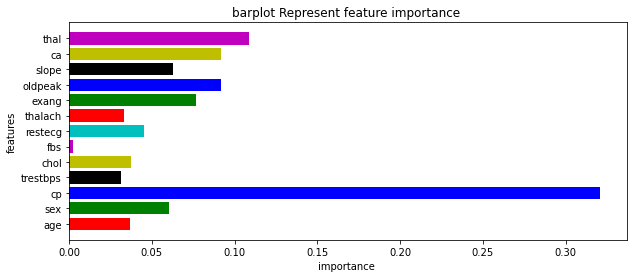

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': egb_tuned_params_model.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

#### ROC Curve

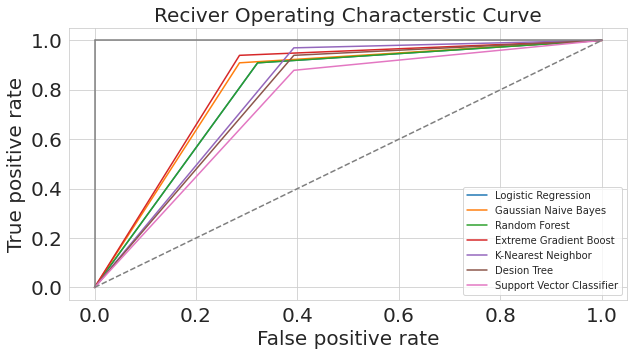

In [ ]:
from sklearn.metrics import roc_curve
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test, y_pred)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test, y_pred_selector_nb)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test, y_pred_selector_rfc)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test, y_pred_selector_egb)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test, y_pred_selector_knn)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test, y_pred_selector_dtc)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test, y_pred_selector_svm)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve',fontsize=20)
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Gaussian Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xlabel('False positive rate',fontsize=20)
plt.legend()
plt.show()

In [ ]:
print(lr_false_positive_rate,lr_true_positive_rate,lr_threshold)
print(nb_false_positive_rate,nb_true_positive_rate,nb_threshold)
print(rf_false_positive_rate,rf_true_positive_rate,rf_threshold)
print(xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold)
print(knn_false_positive_rate,knn_true_positive_rate,knn_threshold)
print(dt_false_positive_rate,dt_true_positive_rate,dt_threshold)
print(svc_false_positive_rate,svc_true_positive_rate,svc_threshold)

[0.         0.32142857 1.        ] [0.         0.90909091 1.        ] [2 1 0]
[0.         0.28571429 1.        ] [0.         0.90909091 1.        ] [2 1 0]
[0.         0.32142857 1.        ] [0.         0.90909091 1.        ] [2 1 0]
[0.         0.28571429 1.        ] [0.         0.93939394 1.        ] [2 1 0]
[0.         0.39285714 1.        ] [0.         0.96969697 1.        ] [2 1 0]
[0.         0.39285714 1.        ] [0.         0.93939394 1.        ] [2 1 0]
[0.         0.39285714 1.        ] [0.         0.87878788 1.        ] [2 1 0]


#### Accuracy plot

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Gaussian Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'KNN','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_accuracy*100,
                    nb_accuracy*100,rfc_accuracy*100,egb_accuracy*100,knn_accuracy*100,dtc_accuracy*100,svm_accuracy*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,80.327869
1,Gaussian Naive Bayes,81.967213
2,Random Forest,80.327869
3,Extreme Gradient Boost,83.606557
4,KNN,80.327869
5,Decision Tree,78.688525
6,Support Vector Machine,75.409836


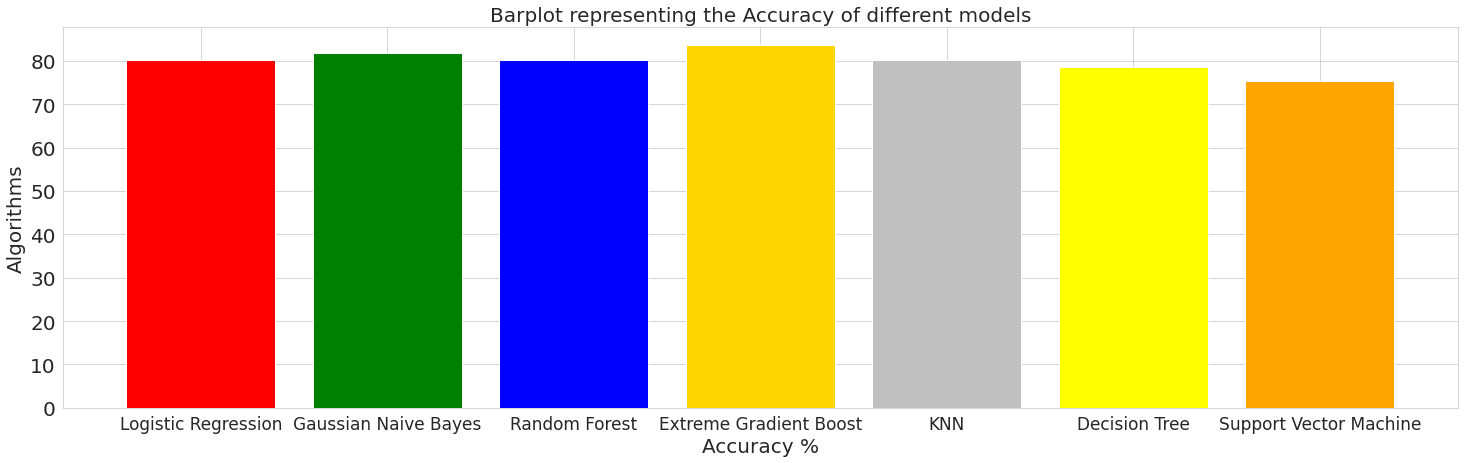

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(25,7))
plt.title("Barplot representing the Accuracy of different models",fontsize=20)
plt.xlabel("Accuracy %", fontsize=20)
plt.ylabel("Algorithms", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

#### Ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier

def get_stacking():
  #defining the base models
  level0 = list()
  level0.append(('random_forest_classifier', RandomForestClassifier()))
  level0.append(('k-Nearest Neighbors', KNeighborsClassifier()))
  level0.append(('Gaussian Naive Bayes', GaussianNB()))
  level0.append(('Extreme Gradient Boost', XGBClassifier()))

  #define meta learner model
  level1 =LogisticRegression()
  #define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
stacked_model = get_stacking() #with Logistic Regress
stacked_model = stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)
test_acc = stacked_model.score(X_test, y_test)
print('R2 Score for test set:', test_acc)

R2 Score for test set: 0.8360655737704918


In [ ]:
#Calculating the Accuracy
stack_accuracy = accuracy_score(y_test, y_pred)
print('R2 Score:', test_acc)
print('RMSE:', rmse(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Ensemble Accuracy:{}%'.format(round((stack_accuracy*100), 3)))
print(classification_report(y_test, y_pred))

R2 Score: 0.8360655737704918
RMSE: 0.40488816508945796
Confusion matrix:
 [[20  8]
 [ 2 31]]
Ensemble Accuracy:83.607%
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

